# G√©n√©ral

In [ ]:
import os
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import hashlib
import numpy as np
import cv2 

## Analyse Exploratoire de Donn√©es (IMAGE)

In [14]:
dossier_image = '../data/raw/Flickr8k_Dataset'

### Compter le nombre total de fichiers

In [15]:
tous_fichiers = []

for f in os.listdir(dossier_image):
    chemin = os.path.join(dossier_image, f)
    if os.path.isfile(chemin):
        tous_fichiers.append(f)

print("Nombre total de fichiers dans le dossier :", len(tous_fichiers))

Nombre total de fichiers dans le dossier : 8091


### Compter le nombre de fichiers par extension

In [16]:
extensions = []

for f in tous_fichiers:
    _, ext = os.path.splitext(f)
    ext = ext.lower()
    if ext == '':
        extensions.append('Sans extension')
    else:
        extensions.append(ext)

compteur_extensions = Counter(extensions)

print("Nombre de fichiers par extension :")
for ext, count in compteur_extensions.items():
    print(ext, ":", count)

Nombre de fichiers par extension :
.jpg : 8091


### V√©rifier si les images sont corrompues

In [17]:
images_corrompues = []

for f in tous_fichiers:
    if f.lower().endswith('.jpg'):
        chemin_image = os.path.join(dossier_image, f)
        try:
            with Image.open(chemin_image) as img:
                img.verify()
        except Exception as e:
            images_corrompues.append((f, str(e)))

if len(images_corrompues) == 0:
    print("Toutes les images JPG sont valides et non corrompues.")
else:
    print(len(images_corrompues), "images JPG corrompues d√©tect√©es :")
    for nom, erreur in images_corrompues:
        print("-", nom, ":", erreur)

Toutes les images JPG sont valides et non corrompues.


### V√©rifier la r√©solution des images

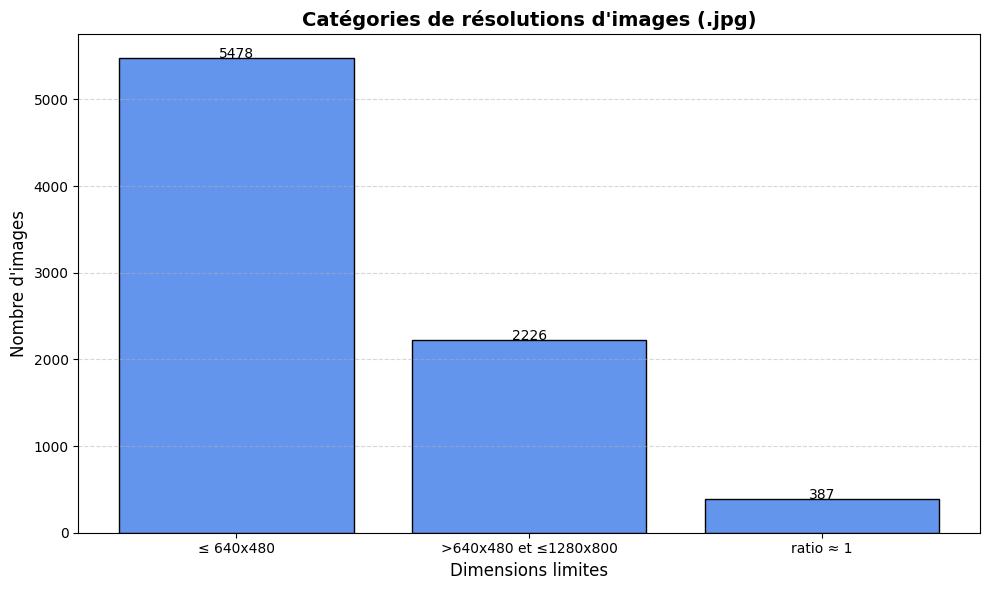

In [18]:
tous_fichiers = os.listdir(dossier_image)

categories = {
    "Petit": 0,
    "Moyen (HD)": 0,
    "Grand (Full HD)": 0,
    "Tr√®s grand (2K/4K+)": 0,
    "Carr√©": 0,
    "Autre": 0
}

dimensions_repr = {
    "Petit": "‚â§ 640x480",
    "Moyen (HD)": ">640x480 et ‚â§1280x800",
    "Grand (Full HD)": "‚â§1920x1080",
    "Tr√®s grand (2K/4K+)": "‚â• 2560x",
    "Carr√©": "ratio ‚âà 1",
    "Autre": "Autres"
}

def classifier_resolution(w, h):
    ratio = w / h
    if abs(ratio - 1) <= 0.1:
        return "Carr√©"
    elif w <= 640 and h <= 480:
        return "Petit"
    elif w <= 1280 and h <= 800:
        return "Moyen (HD)"
    elif w <= 1920 and h <= 1080:
        return "Grand (Full HD)"
    elif w >= 2560:
        return "Tr√®s grand (2K/4K+)"
    else:
        return "Autre"

#Parcours des images
for f in tous_fichiers:
    if f.lower().endswith('.jpg'):
        chemin_image = os.path.join(dossier_image, f)
        try:
            with Image.open(chemin_image) as img:
                w, h = img.size
                cat = classifier_resolution(w, h)
                categories[cat] += 1
        except:
            pass

#Filtrer les cat√©gories avec au moins 1 image
labels_filtr√©s = [label for label, val in categories.items() if val > 0]
valeurs_filtr√©es = [val for val in categories.values() if val > 0]

#Dimensions √† afficher sur l'axe X √† la place des noms
x_labels = [dimensions_repr[label] for label in labels_filtr√©s]

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(valeurs_filtr√©es)), valeurs_filtr√©es, color='cornflowerblue', edgecolor='black')

plt.title("Cat√©gories de r√©solutions d'images (.jpg)", fontsize=14, weight='bold')
plt.xlabel("Dimensions limites", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Valeurs num√©riques au-dessus des barres
for i, val in enumerate(valeurs_filtr√©es):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=10)

#Remplacer les ticks X par les dimensions
plt.xticks(range(len(x_labels)), x_labels)

plt.tight_layout()
plt.show()


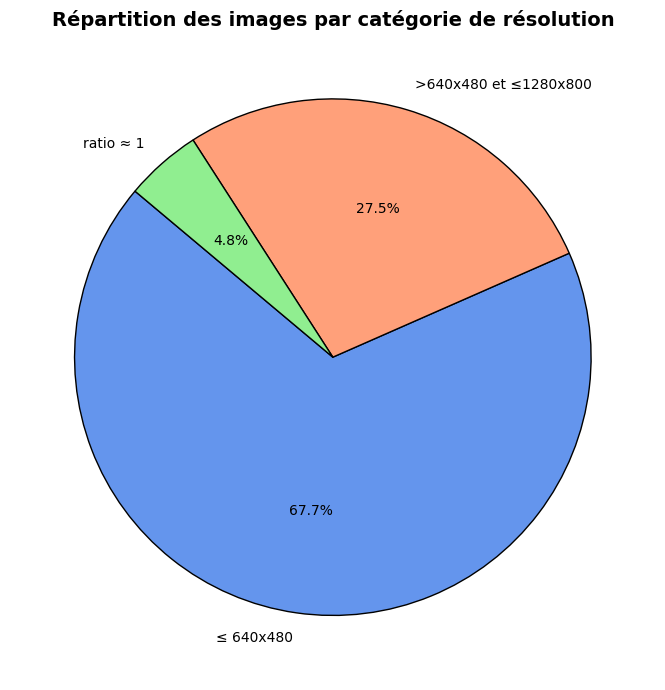

In [19]:
colors = ['#6495ED', '#FFA07A', '#90EE90', '#FFD700', '#90EE90', '#D3D3D3'] 

plt.figure(figsize=(7,7))
plt.pie(valeurs_filtr√©es,
        labels=[dimensions_repr[l] for l in labels_filtr√©s], 
        colors=colors[:len(valeurs_filtr√©es)],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'black'})

plt.title("R√©partition des images par cat√©gorie de r√©solution", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

#### üìä Interpr√©tation succincte et concr√®te des r√©solutions d'images

- **Majorit√© d‚Äôimages de petite r√©solution (‚â§ 640x480)**  
  Elles repr√©sentent environ **65%** de ton dataset.  
  ‚ûî Tes images proviennent majoritairement de sources **basse r√©solution** : photos mobiles anciennes, captures rapides ou images web.

- **Une part significative d‚Äôimages de r√©solution moyenne (640x480 √† 1280x800)**  
  Avec environ **27%**, ce groupe contient des images avec **plus de d√©tails**.  
  ‚ûî Utile pour des **annotations plus pr√©cises** et un meilleur entra√Ænement des mod√®les.

- **Images carr√©es (ratio ‚âà 1) : une minorit√© (~5%)**  
  Ce format est **souvent li√© aux r√©seaux sociaux** (ex. Instagram).  
  ‚ûî √Ä consid√©rer √† part ou √† **recadrer** pour une meilleure homog√©n√©it√©.

- **Autres cat√©gories (Grand, Tr√®s grand, Autre) : tr√®s minoritaires**  
  Cela indique que ta base est **essentiellement constitu√©e d‚Äôimages de faible √† moyenne r√©solution**.

---

#### ü§ñ Ce que √ßa implique pour le mod√®le

- **Majorit√© d‚Äôimages basse r√©solution (‚â§ 640x480)**  
  ‚ûî Le mod√®le sera principalement entra√Æn√© sur des images avec **peu de d√©tails**.  
  ‚ûî Il pourrait **bien d√©tecter les objets** quand ils sont **gros et visibles**, mais **peiner sur les petits objets** ou les d√©tails fins.

- **Images de r√©solution moyenne (640x480 - 1280x800)**  
  ‚ûî Ces images apportent **plus de richesse visuelle**, utiles pour mieux **g√©n√©raliser** sur des cas vari√©s.  
  ‚ûî Elles **√©quilibrent** le dataset et peuvent **renforcer la robustesse** du mod√®le.

- **Images carr√©es ou hors normes**  
  ‚ûî √âtant peu nombreuses, le mod√®le risque de **moins bien g√©rer** ces cas √† l'entra√Ænement.  
  ‚ûî Un **pr√©-traitement adapt√©** (recadrage, redimensionnement **sans distorsion**) est recommand√© pour garantir l'homog√©n√©it√©.

---


#### üéØ Strat√©gies pour chaque cat√©gorie de r√©solution afin de limiter les biais

#### üü¶ 1. Images de petite r√©solution (‚â§ 640x480)
- üìâ Risque : Perte de d√©tails ‚Üí mauvaise reconnaissance de petits objets.
- ‚úÖ Actions recommand√©es :
  - **Sur√©chantillonner** ou **augmenter les images** (zoom, crop, upscale mod√©r√©).
  - **√âviter le sur-redimensionnement** qui introduit du flou.
  - Si possible, compl√©ter avec des images similaires mais en meilleure qualit√©.

#### üü® 2. Images de r√©solution moyenne (640x480 - 1280x800)
- üëç Bon √©quilibre entre taille et qualit√©.
- ‚úÖ Actions recommand√©es :
  - Conserver telles quelles ou **redimensionner l√©g√®rement** vers une taille standard (ex. : 800x600).
  - Servir de **base de r√©f√©rence** pour les autres cat√©gories.

#### üü• 3. Images de haute r√©solution (‚â• 1280x800 jusqu‚Äô√† 2K/4K)
- üìâ Risque : Si trop peu nombreuses ‚Üí peu d‚Äôimpact √† l'entra√Ænement.
- ‚úÖ Actions recommand√©es :
  - **Redimensionner √† une taille standard** (ex. 800x600 ou 640x480).
  - Ne pas les supprimer si elles sont rares ‚Äî elles peuvent enrichir la diversit√©.
  - Attention √† ne pas **perdre d‚Äôobjets petits** en r√©duisant trop.

#### üü© 4. Images carr√©es (ratio ‚âà 1)
- üìâ Risque : Format peu repr√©sent√© ‚Üí possible biais du mod√®le.
- ‚úÖ Actions recommand√©es :
  - **Recadrer ou paddder** pour les ramener √† un ratio standard (ex. 4:3 ou 16:9).
  - Si elles sont utiles (ex : visuels de r√©seaux sociaux), envisager de les regrouper ou d‚Äôen ajouter d‚Äôautres.

#### ‚ö™ 5. Autres formats (non standards)
- üìâ Risque : Distorsion lors du redimensionnement sans pr√©caution.
- ‚úÖ Actions recommand√©es :
  - Analyser au cas par cas : recadrage intelligent ou padding.
  - Uniformiser le ratio globalement pour faciliter l‚Äôentra√Ænement.

### ‚úÖ En r√©sum√© :
- Viser une **r√©solution coh√©rente** √† l‚Äôentr√©e du mod√®le (ex : 640x480 ou 800x600).
- Appliquer des **pr√©traitements adapt√©s √† chaque cas** : recadrage, redimensionnement, padding.
- **√âquilibrer** le dataset par augmentation ou en r√©duisant les extr√™mes pour √©viter qu‚Äôun type de r√©solution domine.

---

### V√©rifier la couleur

In [20]:
modes = {}

for f in tous_fichiers:
    if f.lower().endswith('.jpg'):
        chemin_image = os.path.join(dossier_image, f)
        try:
            with Image.open(chemin_image) as img:
                mode = img.mode
                if mode in modes:
                    modes[mode] += 1
                else:
                    modes[mode] = 1
        except:
            pass

print("Modes couleur trouv√©s et leur nombre :")
for mode, count in modes.items():
    print(f"{mode} : {count}")


Modes couleur trouv√©s et leur nombre :
RGB : 8091


### V√©rifier les doublons

Images JPG uniques : 8090
Doublons d√©tect√©s : 1


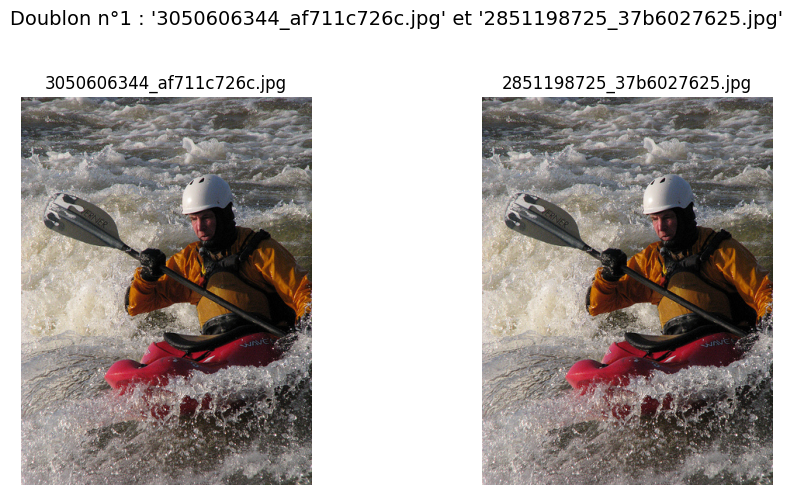

In [21]:
def calculer_md5(chemin_fichier):
    hasher = hashlib.md5()
    with open(chemin_fichier, 'rb') as f:
        while True:
            bloc = f.read(65536)
            if not bloc:
                break
            hasher.update(bloc)
    return hasher.hexdigest()

hashes = {}
doublons = []

for f in os.listdir(dossier_image):
    if f.lower().endswith('.jpg'):
        chemin_image = os.path.join(dossier_image, f)
        h = calculer_md5(chemin_image)
        if h in hashes:
            doublons.append((f, hashes[h]))
        else:
            hashes[h] = f

print(f"Images JPG uniques : {len(hashes)}")
print(f"Doublons d√©tect√©s : {len(doublons)}")

if doublons:
    for i, (f1, f2) in enumerate(doublons, start=1):
        chemin1 = os.path.join(dossier_image, f1)
        chemin2 = os.path.join(dossier_image, f2)

        img1 = Image.open(chemin1)
        img2 = Image.open(chemin2)

        plt.figure(figsize=(10,5))
        plt.suptitle(f"Doublon n¬∞{i} : '{f1}' et '{f2}'", fontsize=14)

        plt.subplot(1, 2, 1)
        plt.imshow(img1)
        plt.title(f1)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img2)
        plt.title(f2)
        plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])  
        plt.show()
else:
    print("Aucun doublon d√©tect√©.")


### V√©rifier la qualit√© des images

Images trop sombres : 23
Images trop claires : 81
Images floues : 18
Images correctes : 7969


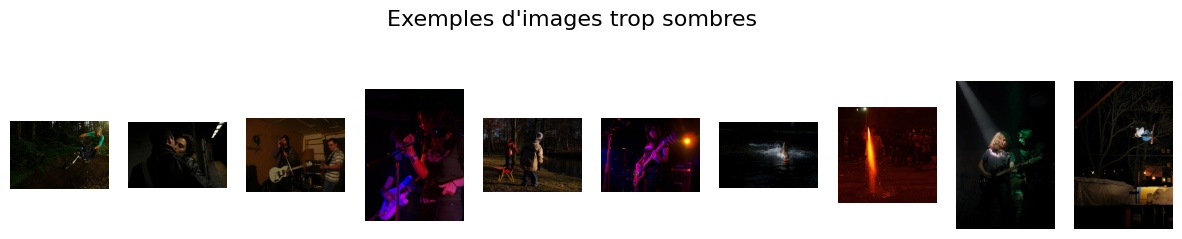

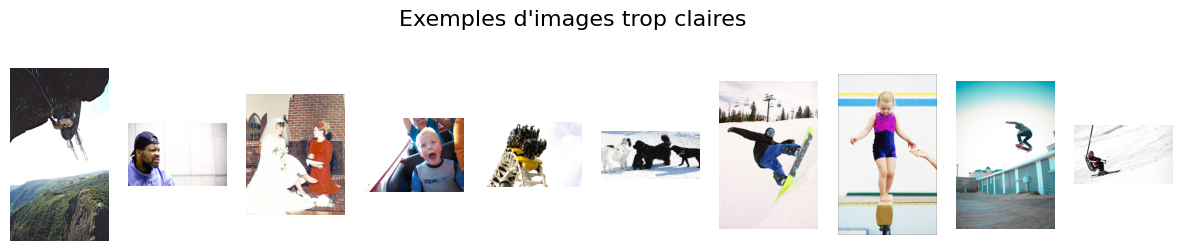

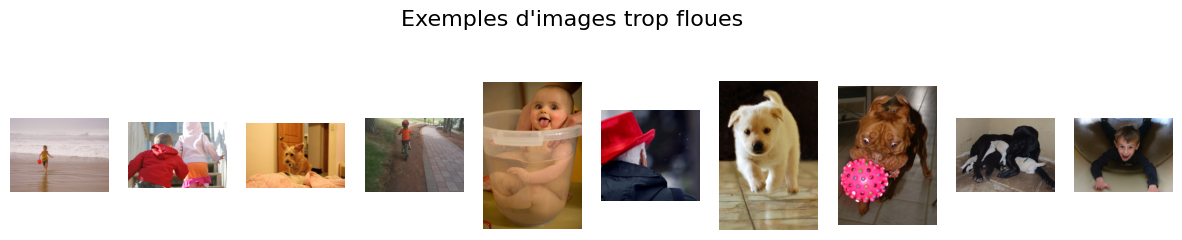

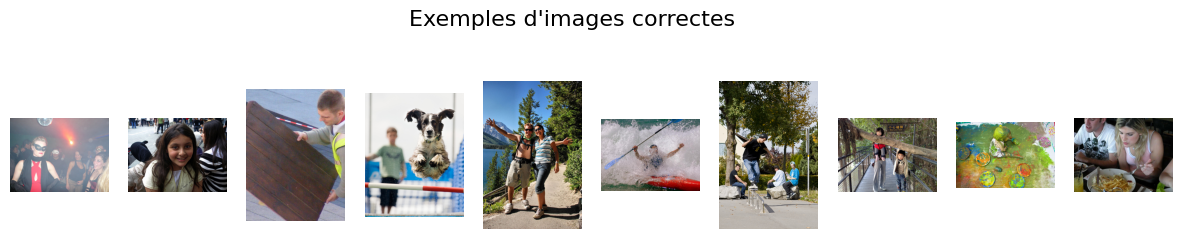

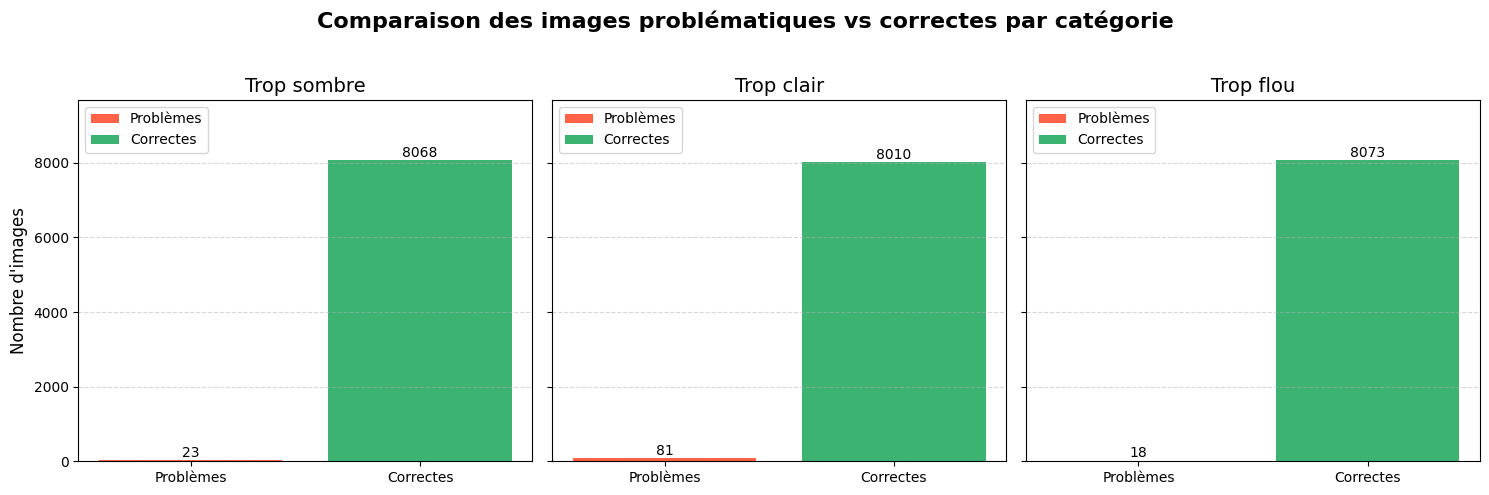

In [22]:
def luminosite_moyenne(image_path):
    img = Image.open(image_path).convert('L')
    np_img = np.array(img)
    return np_img.mean()

def luminosite_locale(image_path, seuil_pixel=80, pourcentage_min=5):
    img = Image.open(image_path).convert('L')
    np_img = np.array(img)
    nb_pixels_clairs = np.sum(np_img > seuil_pixel)
    total_pixels = np_img.size
    pourcentage_clair = 100 * nb_pixels_clairs / total_pixels
    return pourcentage_clair >= pourcentage_min

def trop_clair_local(image_path, seuil_pixel=240, pourcentage_max=30):
    img = Image.open(image_path).convert('L')
    np_img = np.array(img)
    nb_pixels_clairs = np.sum(np_img > seuil_pixel)
    total_pixels = np_img.size
    pourcentage_clair = 100 * nb_pixels_clairs / total_pixels
    return pourcentage_clair > pourcentage_max

def variance_laplacian(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    return cv2.Laplacian(img, cv2.CV_64F).var()

#Seuils (ajuster selon dataset)
seuil_sombre = 50
seuil_lum_local = 5  # %
seuil_trop_clair = 30  # %
seuil_flou = 100

#Stockage r√©sultats
images_trop_sombres = []
images_trop_claires = []
images_floues = []
images_correctes = []

exemples_trop_sombres = []
exemples_trop_claires = []
exemples_floues = []
exemples_correctes = []

max_exemples = 10

for f in os.listdir(dossier_image):
    if f.lower().endswith('.jpg'):
        chemin = os.path.join(dossier_image, f)
        try:
            lum_moy = luminosite_moyenne(chemin)
            lum_loc = luminosite_locale(chemin, pourcentage_min=seuil_lum_local)
            clair = trop_clair_local(chemin, pourcentage_max=seuil_trop_clair)
            var_lap = variance_laplacian(chemin)

            #Trop sombre ?
            if lum_moy < seuil_sombre and not lum_loc:
                images_trop_sombres.append(f)
                if len(exemples_trop_sombres) < max_exemples:
                    exemples_trop_sombres.append(chemin)
                continue

            #Trop clair ?
            if clair:
                images_trop_claires.append(f)
                if len(exemples_trop_claires) < max_exemples:
                    exemples_trop_claires.append(chemin)
                continue

            #Trop flou ?
            if var_lap is not None and var_lap < seuil_flou:
                images_floues.append(f)
                if len(exemples_floues) < max_exemples:
                    exemples_floues.append(chemin)
                continue

            #Sinon correct
            images_correctes.append(f)
            if len(exemples_correctes) < max_exemples:
                exemples_correctes.append(chemin)

        except Exception as e:
            print(f"Erreur sur {f} : {e}")

print(f"Images trop sombres : {len(images_trop_sombres)}")
print(f"Images trop claires : {len(images_trop_claires)}")
print(f"Images floues : {len(images_floues)}")
print(f"Images correctes : {len(images_correctes)}")

#Fonction pour afficher exemples (√† r√©utiliser)
def afficher_exemples(liste_chemins, titre):
    import matplotlib.pyplot as plt
    if not liste_chemins:
        print(f"Aucun exemple pour {titre}")
        return
    n = len(liste_chemins)
    plt.figure(figsize=(15, 3))
    plt.suptitle(titre, fontsize=16)
    for i, chemin_img in enumerate(liste_chemins):
        img = Image.open(chemin_img)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

#Affichage
afficher_exemples(exemples_trop_sombres, "Exemples d'images trop sombres")
afficher_exemples(exemples_trop_claires, "Exemples d'images trop claires")
afficher_exemples(exemples_floues, "Exemples d'images trop floues")
afficher_exemples(exemples_correctes, "Exemples d'images correctes")

#Donn√©es pour les graphes
categories = ["Trop sombre", "Trop clair", "Trop flou"]
problemes = [len(images_trop_sombres), len(images_trop_claires), len(images_floues)]
total_images = len(images_trop_sombres) + len(images_trop_claires) + len(images_floues) + len(images_correctes)

#Correctes = images sans ce probl√®me (exclusif)
corrects = [total_images - p for p in problemes]

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, ax in enumerate(axs):
    bars_problemes = ax.bar(['Probl√®mes'], [problemes[i]], color='tomato', label='Probl√®mes')
    bars_corrects = ax.bar(['Correctes'], [corrects[i]], color='mediumseagreen', label='Correctes')
    ax.set_title(categories[i], fontsize=14)
    ax.set_ylim(0, max(problemes + corrects) * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if i == 0:
        ax.set_ylabel('Nombre d\'images', fontsize=12)
    ax.legend()

    # Ajout des valeurs au-dessus des barres
    for bar in bars_problemes + bars_corrects:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', va='bottom', fontsize=10)

plt.suptitle("Comparaison des images probl√©matiques vs correctes par cat√©gorie", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### ‚úÖ Interpr√©tation

- **Images trop sombres** (23 cas) :
  - Faible luminosit√© globale sans zone lumineuse significative.
  - Risque de perte d‚Äôinformations visuelles ‚Üí le mod√®le pourrait mal apprendre.

- **Images trop claires** (81 cas) :
  - Forte proportion de pixels surexpos√©s (valeurs > 240).
  - Peut nuire √† la d√©tection d‚Äôobjets sur fond tr√®s clair ou blanc.

- **Images floues** (18 cas) :
  - Variance du Laplacien faible ‚Üí contours peu marqu√©s.
  - Ces images peuvent r√©duire la capacit√© du mod√®le √† distinguer les bords et formes.
---

#### üìà Implications pour l'entra√Ænement

- Un **mod√®le entra√Æn√© sur des images sur/sous-expos√©es ou floues** peut :
  - Apprendre des repr√©sentations visuelles erron√©es.
  - √ätre moins robuste √† la variation de qualit√© des images en test r√©el.
  - N√©cessiter un traitement ou √©quilibrage pr√©alable pour √©viter les biais.

---

#### üõ†Ô∏è Strat√©gies recommand√©es

- üîß **Pr√©traitement des images** :
  - √âclaircir l√©g√®rement les images trop sombres avec histogramme √©galis√© ou gamma correction.
  - R√©duire la surexposition (ex. clip intensit√© max, ajustement contraste).
  - Am√©liorer l√©g√®rement la nettet√© avec des filtres adapt√©s (e.g. unsharp masking).

- üóÉÔ∏è **Tri ou exclusion** :
  - Supprimer ou isoler les images trop extr√™mes pour pr√©server la qualit√© moyenne.
  - Utiliser ces images dans des sc√©narios d‚Äôaugmentation contr√¥l√©e si n√©cessaire.

- üìâ **√âquilibrage** :
  - R√©duire la surrepr√©sentation des images trop claires si elles biaisent les r√©sultats.
  - √âventuellement compenser les cat√©gories minoritaires par duplication ou g√©n√©ration d‚Äôimages (data augmentation).
---

üéØ **Images √† exclure ou √† traiter en inf√©rence**

| Type d'image       | Pourquoi les exclure ?                                                       | Recommandation                                 |
|--------------------|-----------------------------------------------------------------------------|------------------------------------------------|
| üï∂Ô∏è Trop sombres      | Informations visuelles peu exploitables, objets non visibles ‚Üí risque de mauvaise pr√©diction. | ‚úÖ √Ä exclure si non r√©cup√©rables par pr√©traitement. |
| ‚òÄÔ∏è Trop claires      | Surexposition ‚Üí objets fondus dans le blanc, perte de contours.             | ‚ö†Ô∏è √Ä filtrer ou corriger si c‚Äôest r√©cup√©rable.       |
| üå´Ô∏è Floues            | Bords non d√©finis ‚Üí le mod√®le pourrait ne pas d√©tecter les objets ou mal les classer. | ‚úÖ √Ä exclure si tr√®s floues, sinon renforcer les bons exemples. |
---

üß† **Raisonnement :**

L‚Äôobjectif en inf√©rence est d‚Äô√©viter les erreurs graves ou bruit√©es dues √† des images non exploitables.

Mieux vaut filtrer les cas probl√©matiques connus √† l‚Äôavance (images de mauvaise qualit√©) que d‚Äôintroduire de l‚Äôincertitude ou du bruit dans les pr√©dictions.

Si tu veux traiter toutes les images en inf√©rence, tu peux :

- les pr√©traiter automatiquement (√©claircir, corriger, filtrer),
- ou les flagger comme "basse qualit√©" pour que le mod√®le ou le pipeline d√©cisionnel les traite diff√©remment.
---